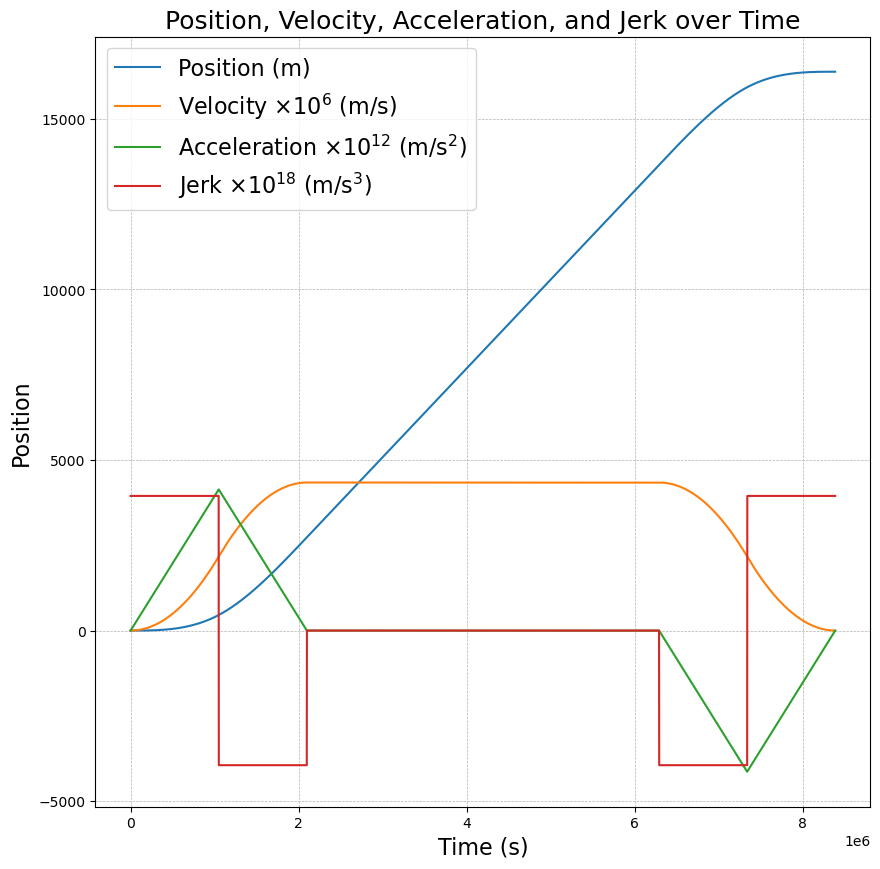

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define time vector from 0 to 2^23 with 1 second increments
t = np.arange(0, 2**23 + 1, 1)

# Define jerk constant
jerk_constant = 3.947218709 * 10**-16

# Define jerk profile
jerk = np.zeros_like(t, dtype=float)
jerk[t < 2**20] = jerk_constant
jerk[(t >= 2**20) & (t < 2**21)] = -jerk_constant
jerk[(t >= 6*2**20) & (t < 7*2**20)] = -jerk_constant
jerk[(t >= 7*2**20) & (t < 2**23)] = jerk_constant

# Calculate acceleration using the cumulative sum of jerk
acceleration = np.cumsum(jerk)

# Calculate velocity using the cumulative sum of acceleration
velocity = np.cumsum(acceleration)

# Calculate position using the cumulative sum of velocity
position = np.cumsum(velocity)

# Scale position to desired range (0 to 2^14)
position = (position - np.min(position)) / (np.max(position) - np.min(position)) * 2**14

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(10, 10))

# Define font size
label_font_size = 16
title_font_size = 18

# Define the downsample rate
downsample_rate = 1000

# Plot position, velocity, acceleration, and jerk
ax.plot(t[::downsample_rate], position[::downsample_rate], label=r'Position (m)')
ax.plot(t[::downsample_rate], velocity[::downsample_rate] * 10e6, label=r'Velocity $\times 10^{6}$ (m/s)')
ax.plot(t[::downsample_rate], acceleration[::downsample_rate] * 10e12, label=r'Acceleration $\times 10^{12}$ (m/s$^2$)')
ax.plot(t[::downsample_rate], jerk[::downsample_rate] * 10e18, label=r'Jerk $\times 10^{18}$ (m/s$^3$)')

plt.grid(lw=0.5,ls='--')

# Add the legend with adjusted font size
ax.legend(loc='best', fontsize=label_font_size)

# Add x and y labels with adjusted font size
ax.set_xlabel('Time (s)', fontsize=label_font_size)
ax.set_ylabel('Position', fontsize=label_font_size)

# Add a title with adjusted font size
ax.set_title('Position, Velocity, Acceleration, and Jerk over Time', fontsize=title_font_size)

# Show the plot
plt.show()


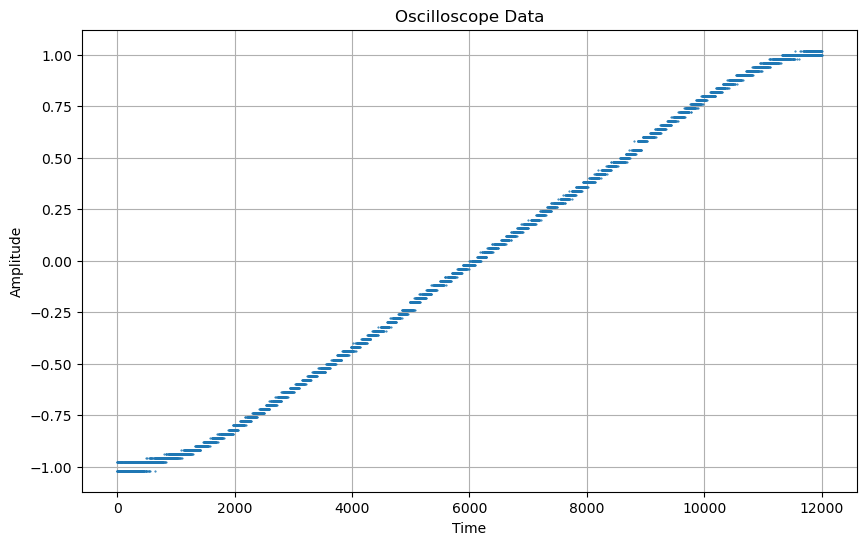

In [7]:
# Load data from csv file
data = np.loadtxt('NewFile2.csv', delimiter=',', skiprows = 2, usecols= (0,1))

# Separate the data into time and amplitude for clarity
# assuming that the first column is time and the second column is amplitude
time = data[:,0]
amplitude = data[:,1]

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(time, amplitude,'.', markersize = 1)

plt.title('Oscilloscope Data')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.grid(True)
plt.show()


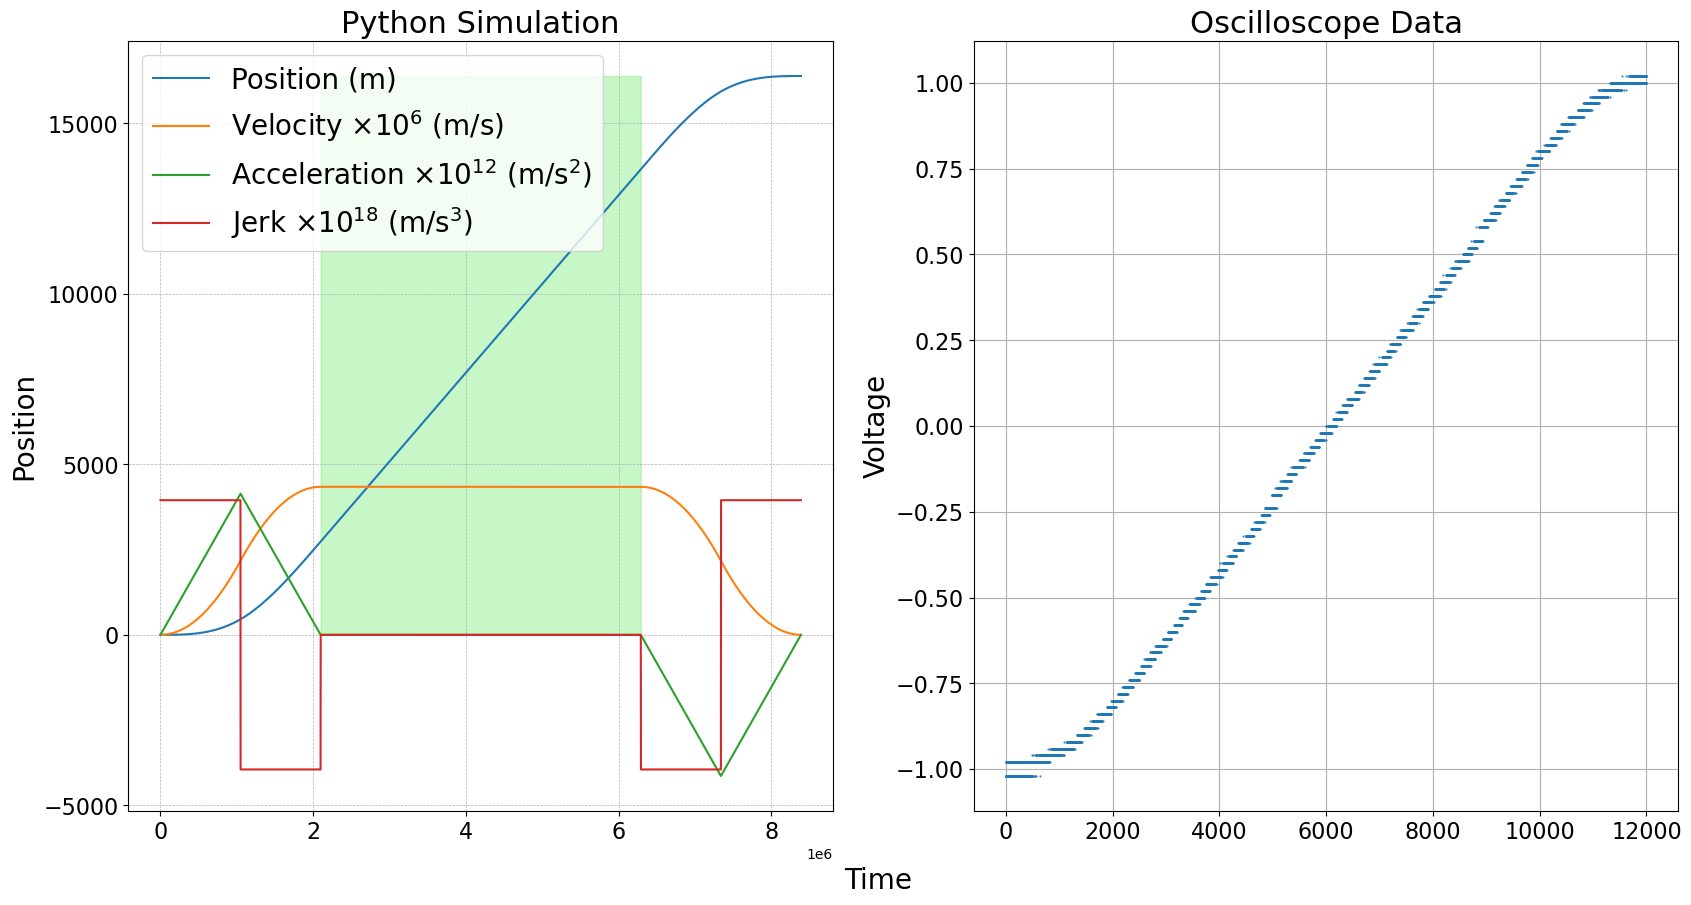

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define time vector from 0 to 2^23 with 1 second increments
t = np.arange(0, 2**23 + 1, 1)

# Define jerk constant
jerk_constant = 3.947218709 * 10**-16

# Define jerk profile
jerk = np.zeros_like(t, dtype=float)
jerk[t < 2**20] = jerk_constant
jerk[(t >= 2**20) & (t < 2**21)] = -jerk_constant
jerk[(t >= 6*2**20) & (t < 7*2**20)] = -jerk_constant
jerk[(t >= 7*2**20) & (t < 2**23)] = jerk_constant

# Calculate acceleration using the cumulative sum of jerk
acceleration = np.cumsum(jerk)

# Calculate velocity using the cumulative sum of acceleration
velocity = np.cumsum(acceleration)

# Calculate position using the cumulative sum of velocity
position = np.cumsum(velocity)
position = (position - np.min(position)) / (np.max(position) - np.min(position)) * 2**14

# Define font size
label_font_size = 20
title_font_size = 22

# Define the downsample rate
downsample_rate = 1000

# Load data from csv file
data = np.loadtxt('NewFile2.csv', delimiter=',', skiprows = 2, usecols= (0,1))

# Separate the data into time and amplitude for clarity
# assuming that the first column is time and the second column is amplitude
osc_time = data[:,0]
osc_amplitude = data[:,1]

# Create the figure and axis objects
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# Plot position, velocity, acceleration, and jerk
axs[0].plot(t[::downsample_rate], position[::downsample_rate], label=r'Position (m)')
axs[0].plot(t[::downsample_rate], velocity[::downsample_rate] * 10e6, label=r'Velocity $\times 10^{6}$ (m/s)')
axs[0].plot(t[::downsample_rate], acceleration[::downsample_rate] * 10e12, label=r'Acceleration $\times 10^{12}$ (m/s$^2$)')
axs[0].plot(t[::downsample_rate], jerk[::downsample_rate] * 10e18, label=r'Jerk $\times 10^{18}$ (m/s$^3$)')


# Add light green shaded region
x_fill = np.logical_and(t[::downsample_rate] >= 2*2**20, t[::downsample_rate] <= 6*2**20)
axs[0].fill_between(t[::downsample_rate][x_fill], position.min(), position.max(), color='lightgreen', alpha=0.5)

axs[0].grid(lw=0.5,ls='--')

# Add the legend with adjusted font size
axs[0].legend(loc='best', fontsize=label_font_size)

# Add a title with adjusted font size
axs[0].set_title('Python Simulation', fontsize=title_font_size)

# Set y label
axs[0].set_ylabel('Position', fontsize=label_font_size)

# Plot the data
axs[1].plot(osc_time, osc_amplitude,'.', markersize = 1)

axs[1].set_title('Oscilloscope Data', fontsize=title_font_size)

axs[1].grid(True)

# Set y label
axs[1].set_ylabel('Voltage', fontsize=label_font_size)

# Add common x label
fig.text(0.5, 0.04, 'Time', ha='center', va='center', fontsize=label_font_size)

# For plot 1
axs[0].tick_params(axis='both', which='major', labelsize=16)

# For plot 2
axs[1].tick_params(axis='both', which='major', labelsize=16)


plt.savefig('s-crv.png', dpi=300)
plt.show()


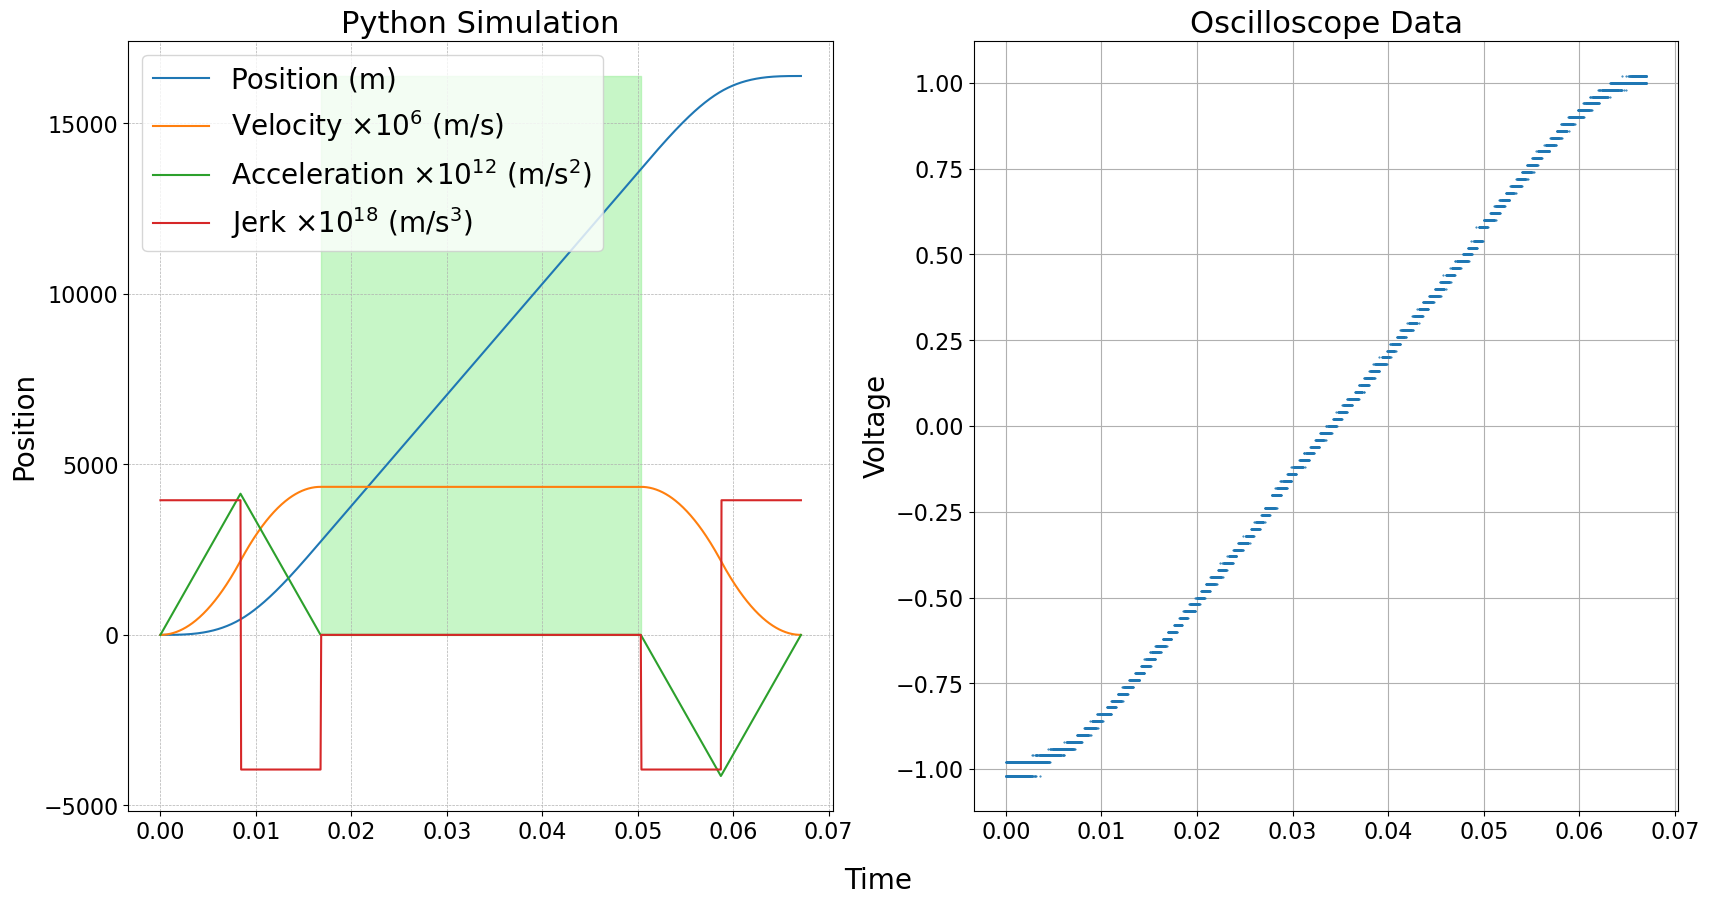

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define time vector from 0 to 0.0671 with the same number of points as the original time vector
t = np.linspace(0, 0.0671, 2**23 + 1)

# Define jerk constant
jerk_constant = 3.947218709 * 10**-16

# Define jerk profile
jerk = np.zeros_like(t, dtype=float)
jerk[t < 0.0671 * 2**20/2**23] = jerk_constant
jerk[(t >= 0.0671 * 2**20/2**23) & (t < 0.0671 * 2**21/2**23)] = -jerk_constant
jerk[(t >= 0.0671 * 6*2**20/2**23) & (t < 0.0671 * 7*2**20/2**23)] = -jerk_constant
jerk[(t >= 0.0671 * 7*2**20/2**23) & (t < 0.0671)] = jerk_constant

# Calculate acceleration using the cumulative sum of jerk
acceleration = np.cumsum(jerk)

# Calculate velocity using the cumulative sum of acceleration
velocity = np.cumsum(acceleration)

# Calculate position using the cumulative sum of velocity
position = np.cumsum(velocity)
position = (position - np.min(position)) / (np.max(position) - np.min(position)) * 2**14

# Define font size
label_font_size = 20
title_font_size = 22

# Define the downsample rate
downsample_rate = int(len(t) / 1000)

# Load data from csv file
data = np.loadtxt('NewFile2.csv', delimiter=',', skiprows=2, usecols=(0, 1))

# Separate the data into time and amplitude for clarity
# assuming that the first column is time and the second column is amplitude
osc_time = data[:, 0]
osc_amplitude = data[:, 1]

# Create new oscilloscope time array that matches the time range of the first plot
osc_time_new = np.linspace(0, 0.067, len(osc_time))

# Create the figure and axis objects
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# Plot position, velocity, acceleration, and jerk
axs[0].plot(t[::downsample_rate], position[::downsample_rate], label=r'Position (m)')
axs[0].plot(t[::downsample_rate], velocity[::downsample_rate] * 10e6, label=r'Velocity $\times 10^{6}$ (m/s)')
axs[0].plot(t[::downsample_rate], acceleration[::downsample_rate] * 10e12, label=r'Acceleration $\times 10^{12}$ (m/s$^2$)')
axs[0].plot(t[::downsample_rate], jerk[::downsample_rate] * 10e18, label=r'Jerk $\times 10^{18}$ (m/s$^3$)')

# Add light green shaded region
x_fill = np.logical_and(t[::downsample_rate] >= 0.0671 * 2*2**20/2**23, t[::downsample_rate] <= 0.0671 * 6*2**20/2**23)
axs[0].fill_between(t[::downsample_rate][x_fill], position.min(), position.max(), color='lightgreen', alpha=0.5)

axs[0].grid(lw=0.5, ls='--')

# Add the legend with adjusted font size
axs[0].legend(loc='best', fontsize=label_font_size)

# Add a title with adjusted font size
axs[0].set_title('Python Simulation', fontsize=title_font_size)

# Set y label
axs[0].set_ylabel('Position (arb. units)', fontsize=label_font_size)

# Plot the data with new oscilloscope time
axs[1].plot(osc_time_new, osc_amplitude, '.', markersize=1)

axs[1].set_title('Oscilloscope Data', fontsize=title_font_size)

axs[1].grid(True)

# Set y label
axs[1].set_ylabel('Voltage (V)', fontsize=label_font_size)

# Add common x label
fig.text(0.5, 0.04, 'Time (s)', ha='center', va='center', fontsize=label_font_size)

# For plot 1
axs[0].tick_params(axis='both', which='major', labelsize=16)

# For plot 2
axs[1].tick_params(axis='both', which='major', labelsize=16)

plt.savefig('s-crv.png', dpi=300)
plt.show()
